# Explore here

In [26]:
# Your code here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv')
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,...,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,...,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,...,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.362847,2244,9.018930,1048,4.212049,12209,49.069571,12042,48.398376,164,0.659137,113,0.454162,46,0.184880,307,1.233873,24881,-277,2820,10.4,12.9,-2.5,0.5,-9.1,...,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,6150,23.5,Barbour,Alabama,1,5,19689,57.5,55.6,59.1,11325,40.7,39.5,41.9,8013,11.0,10.1,11.8,2159,12.1,10.7,13.3,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,3038,13.562500,3115,13.906250,2545,11.361607,1723,7.691964,785,3.504464,17211,76.834821,4770,21.294643,98,0.437500,53,0.236607,26,0.116071,242,1.080357,22400,-155,2151,11.1,11.4,-0.3,0.4,-7.0,...,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,22580,4773,21.1,Bibb,Alabama,1,7,17813,51.6,49.6,53.4,9190,38.7,37.4,40.2,6894,8.6,7.9,9.3,1533,10.0,8.8,11.3,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,7474,12.921853,7844,13.561549,6965,12.041840,4931,8.525242,2335,4.036999,55456,95.878285,950,1.642462,378,0.653527,185,0.319848,70,0.121024,801,1.384855,57840,13,489,11.8,11.4,0.3,0.1,-0.2,...,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,57667,13600,23.6,Blount,Alabama,1,9,44448,46.3,44.3,48.4,20584,34.0,32.4,35.5,15112,9.2,8.4,10.1,4101,10.5,9.1,12.0,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [30]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [31]:

x = df.drop(columns=['Heart disease_prevalence', 'Heart disease_Lower 95% CI','Heart disease_Upper 95% CI'])
y = df['Heart disease_prevalence']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,...,Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,26127,26625,3221,12.097653,3463,13.006573,2922,10.974648,2829,10.625352,2831,10.632864,3831,14.388732,3860,14.497653,2460,9.239437,1208,4.537089,25313,95.072300,337,1.265728,428,1.607512,89,0.334272,11,0.041315,447,1.678873,26625,167,303,11.3,10.0,1.3,1.5,3.5,...,87.6,7.9,6.7,11.773059,10.076354,0.383557,19.750506,16.042791,54.078829,0,26317,7218,27.4,879,22,26,127,20545,49.7,47.3,51.9,10213,38.6,36.8,40.4,7930,2072,11.3,9.6,13.0,2314,13.7,12.6,14.9,2823,3.8,3.5,4.1,771,6
2302,42121,51266,5272,10.283619,5751,11.217961,5137,10.020286,5341,10.418211,5880,11.469590,7885,15.380564,8271,16.133500,4801,9.364881,2928,5.711388,49662,96.871221,593,1.156712,109,0.212617,231,0.450591,22,0.042913,649,1.265946,51266,-557,1302,9.7,13.1,-3.4,0.0,-7.4,...,88.2,8.7,7.2,28.032647,22.692714,0.796587,41.534592,28.837240,107.146919,8,52880,15253,28.8,1404,38,42,121,41304,46.7,44.0,49.2,19282,33.2,31.3,35.1,13713,3796,9.9,8.3,11.5,4097,13.1,11.9,14.2,5416,3.5,3.2,3.8,1454,5
761,18133,37779,3915,10.362900,5118,13.547209,6202,16.416528,4363,11.548744,4451,11.781678,5107,13.518092,4349,11.511686,2713,7.181238,1561,4.131925,35248,93.300511,1435,3.798407,135,0.357341,394,1.042907,18,0.047646,549,1.453188,37779,169,5022,10.7,9.2,1.5,0.6,2.4,...,74.4,6.5,6.1,19.493913,4.770448,0.745206,14.853312,18.759998,49.149727,6,37543,8058,21.5,327,14,18,133,30379,47.0,44.9,49.1,14283,33.7,32.1,35.4,10238,2222,9.2,7.9,10.4,2792,12.2,11.2,13.1,3698,2.9,2.7,3.1,871,2
2194,40131,91984,11163,12.135806,12646,13.748043,11595,12.605453,11357,12.346712,11444,12.441294,12774,13.887198,10791,11.731388,6736,7.323013,3478,3.781092,69216,75.247869,1175,1.277396,12403,13.483867,1370,1.489389,79,0.085885,7741,8.415594,91984,505,1216,10.6,9.1,1.4,0.5,3.7,...,68.5,6.2,5.8,26.383926,30.046416,2.915995,30.769583,52.721196,108.754962,6,90098,19479,21.6,1350,36,40,131,70506,46.9,44.9,48.7,33057,36.5,35.1,38.1,25735,5484,8.1,7.1,9.3,5716,11.2,10.4,12.0,7913,3.0,2.8,3.2,2118,3
1241,26025,134487,16698,12.416070,17666,13.135842,17281,12.849569,15993,11.891856,15845,11.781808,17982,13.370809,16909,12.572962,10074,7.490687,6039,4.490397,109628,81.515686,15004,11.156469,1047,0.778514,4026,2.993598,61,0.045358,4721,3.510376,134487,129,4326,12.0,10.3,1.7,2.3,-3.0,...,87.6,7.9,6.7,59.467546,50.897224,1.937404,99.762864,81.034623,273.160542,32,134327,31227,23.2,7

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_esc = scaler.fit_transform(x_train)
x_test_esc = scaler.transform(x_test)
x_train_esc = pd.DataFrame(x_train_esc, columns=x_train.columns, index=x_train.index)
x_test_esc = pd.DataFrame(x_test_esc, columns=x_test.columns, index=x_test.index)
x_train_esc.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,...,Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,-0.301633,-0.229763,-0.225393,0.102383,-0.231350,0.162374,-0.229775,-0.429454,-0.223780,-0.665485,-0.228216,-0.698327,-0.227030,0.585470,-0.231375,0.538689,-0.232151,0.402383,-0.231665,-0.117970,-0.227350,0.648457,-0.229971,-0.557226,-0.167939,-0.096503,-0.138755,-0.431441,-0.108704,-0.096315,-0.213554,-0.301256,-0.229763,-0.146837,-0.332789,0.047698,-0.138376,0.121309,0.185519,0.314540,...,0.715274,0.211338,-0.066614,-0.263175,-0.211771,-0.295176,-0.200241,-0.212795,-0.208077,-0.279417,-0.228413,-0.227824,0.501352,0.343882,-0.317280,-0.303534,0.211484,-0.230288,0.460434,0.420037,0.484458,-0.231574,0.796252,0.764229,0.833508,-0.230636,-0.224232,0.951061,0.856648,0.989521,-0.222477,0.244361,0.209312,0.314479,-0.215940,0.644725,0.576430,0.657452,-0.216950,0.910528
2302,0.761573,-0.161280,-0.179851,-0.754597,-0.181109,-0.836073,-0.188375,-0.736296,-0.176225,-0.785934,-0.163303,-0.073361,-0.139120,1.253363,-0.112664,1.194600,-0.124916,0.460098,-0.099555,0.651730,-0.132168,0.759892,-0.225814,-0.564855,-0.223105,-0.279693,-0.135758,-0.390334,-0.103989,-0.094787,-0.196637,-0.578354,-0.161280,-0.370444,-0.192139,-0.592179,1.034033,-1.053997,-0.520507,-0.647606,...,0.772171,0.822599,0.372584,-0.164761,-0.074503,-0.204487,-0.106092,-0.123374,-0.117282,-0.190529,-0.153492,-0.106368,0.757912,1.314203,0.812126,0.761378,0.156293,-0.155864,-0.009886,-0.098742,0.061751,-0.146243,-0.401264,-0.471474,-0.324419,-0.158219,-0.121664,0.350976,0.230367,0.413368,-0.117073,0.021661,-0.060621,0.064137,-0.135257,0.109985,0.000382,0.161947,-0.135212,0.249092
761,-0.833037,-0.198764,-0.209983,-0.717144,-0.195009,0.464170,-0.168470,1.320194,-0.194740,-0.128551,-0.193726,0.159743,-0.199360,-0.000813,-0.218215,-0.658567,-0.220562,-0.544560,-0.204552,-0.383537,-0.188513,0.538703,-0.212142,-0.379993,-0.218609,-0.260687,-0.132317,-0.181013,-0.105703,-0.090267,-0.205012,-0.452704,-0.198764,-0.146220,0.331601,-0.192256,-0.440933,0.171323,-0.238097,0.217443,...,-0.536466,-0.858370,-0.593651,-0.216443,-0.269500,-0.215769,-0.221406,-0.193804,-0.216510,-0.212751,-0.196750,-0.215126,-0.579864,-0.676341,-0.881983,-0.835989,0.266675,-0.195032,0.037146,0.042743,0.046095,-0.193279,-0.290383,-0.291735,-0.258876,-0.201734,-0.215308,0.050934,0.037666,-0.009144,-0.194220,-0.312388,-0.330555,-0.329256,-0.188714,-0.959495,-0.959698,-0.994232,

In [35]:
x_train.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,...,Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,2512.000000,2.512000e+03,2.512000e+03,2512.000000,2.512000e+03,2512.000000,2.512000e+03,2512.000000,2.512000e+03,2512.000000,2.512000e+03,2512.000000,2.512000e+03,2512.000000,2.512000e+03,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2.512000e+03,2512.000000,2.512000e+03,2512.000000,2512.000000,2512.000000,2.512000e+03,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2.512000e+03,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,...,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2.512000e+03,2.512000e+03,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2.512000e+03,2512.000000,2512.000000,2512.000000,2.512000e+03,2512.000000,2512.000000,2512.000000,2.512000e+03,2512.000000,2512.00000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,30664.518312,1.092962e+05,1.337153e+04,11.880931,1.399879e+04,12.715698,1.521560e+04,12.310367,1.464969e+04,11.769819,1.355048e+04,11.567808,1.430062e+04,13.519299,1.245728e+04,13.154158,7527.997213,8.364850,4224.148487,4.717071,8.347240e+04,84.604091,1.450009e+04,9.228534,1399.096736,2.342328,6.663127e+03,1.555118,264.571656,0.142131,2996.862261,2.127799,1.092962e+05,642.434713,2666.718153,11.180732,10.365884,0.814889,1.105852,-0.063376,...,80.057205,7.623408,6.775836,55.253973,29.540270,1.727898,66.082089,46.489526,175.695926,25.147691,1.073004e+05,2.228983e+04,24.664212,692.939889,26.494825,30.560510,104.008758,8.477886e+04,46.763057,44.628105,48.805573,3.482467e+04,35.009435,33.398487,36.584912,2.634777e+04,5840.974124,9.08117,7.821815,10.423806,6077.379777,13.041640,12.057205,14.020661,9762.924363,3.438296,3.199801,3.701951,2583.824443,4.623408
std,15046.170737,3.598815e+05,4.504377e+04,2.117196,4.554961e+04,1.791751,5.351350e+04,3.110890,5.283324e+04,1.720091,4.698015e+04,1.339101,4.612480e+04,1.485312,3.716470e+04,2.494505,21834.955300,2.173953,13022.031375,1.525961,2.558651e+05,16.146464,6.159873e+04,14.292935,5783.605021,7.615966,4.738889e+04,2.830258,2333.141340,1.046945,11942.486201,1.490478,3.598815e+05,3238.476790,7104.178082,2.500978,2.644654,3.999753,2.124990,11.331095,...,10.547427,1.309029,1.138666,165.24962

In [36]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train_esc, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
print(f'Intercepto: {model_lr.intercept_}')
print(f'Coeficientes: {model_lr.coef_}')

Intercepto: 8.586106687450231
Coeficientes: [-5.31534788e-01  3.75125799e-01 -1.69325804e+00  3.52876791e+05
  1.16783285e-01  2.98634279e+05  5.67992850e-01  5.18497666e+05
  9.93370723e-01  2.86690614e+05  6.80732183e-02  2.23190332e+05
  7.81730945e-02  2.47559620e+05  2.10582984e+00  4.15763657e+05
  7.04713199e-01  3.62336790e+05  9.35644306e-01  2.54334835e+05
  4.29194210e-02  1.32876849e+06  1.94090452e-01  1.17623263e+06
 -5.81532088e-02  6.26753684e+05  5.21866330e-02  2.32915226e+05
 -1.64690730e-02  8.61579922e+04  5.28233535e-02  1.22658457e+05
  6.38367749e-01  4.78385577e-02  2.39604776e-03 -1.60078335e-01
  1.90460632e-01  3.23103865e-01  1.13361586e-01  4.69601885e-01
 -4.50160471e-01 -1.01139830e-01 -4.45587520e-01 -2.31541756e-01
 -7.41232284e-01  3.99397574e-01  5.03119610e-01  3.35371228e-01
  6.60532551e-01 -3.41364174e-01  1.28485896e-01 -4.85297782e-02
 -1.00385715e-02  3.69352773e-02 -7.77203555e-02 -5.07552263e-02
 -1.02682185e-01  7.14853125e-02  4.10231177e-

In [38]:
y_pred_lr = model_lr.predict(x_test_esc)
from sklearn.metrics import root_mean_squared_error, r2_score

print(f'RMSE: {root_mean_squared_error(y_test, y_pred_lr)}')
print(f'R2: {r2_score(y_test, y_pred_lr)}')

RMSE: 0.23251911139597245
R2: 0.9832419180802235


In [39]:
y_pred_trian_lr = model_lr.predict(x_train_esc)
print(f'RMSE train: {root_mean_squared_error(y_train, y_pred_trian_lr)}')
print(f'R2 train: {r2_score(y_train, y_pred_trian_lr)}')

RMSE train: 0.21767138872002373
R2 train: 0.9844940091786952


In [40]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.1,max_iter=1000000)

model_lasso.fit(x_train_esc, y_train)
y_pred_lasso = model_lasso.predict(x_test_esc)
print(f'RMSE Lasso: {root_mean_squared_error(y_test, y_pred_lasso)}')
print(f'R2 Lasso: {r2_score(y_test, y_pred_lasso)}')

RMSE Lasso: 0.3464645580802435
R2 Lasso: 0.962793002143672


In [41]:
print(f'Coeficientes Lasso: {model_lasso.coef_}')

Coeficientes Lasso: [ 0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.08584374
 -0.          0.06628764 -0.          0.         -0.         -0.05367902
 -0.          0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.11607901
  0.          0.          0.          0.         -0.          0.
  0.          0.13801932 -0.          0.      

In [42]:
resultados = {x_train.columns[i]: model_lasso.coef_[i] for i in range(len(x_train.columns))if model_lasso.coef_[i]>0.05}
resultados


{'70-79 y/o % of total pop': np.float64(0.08584374147019415),
 '80+ y/o % of total pop': np.float64(0.06628763799911085),
 'Percent of Population Aged 60+': np.float64(0.11607901116035071),
 'anycondition_Upper 95% CI': np.float64(0.1380193216407255),
 'COPD_Upper 95% CI': np.float64(0.7167881896157354),
 'CKD_Upper 95% CI': np.float64(0.720309185125694)}

In [44]:
import numpy as np 

alphas = np.linspace(0.20, 100)

alphas

array([  0.2       ,   2.23673469,   4.27346939,   6.31020408,
         8.34693878,  10.38367347,  12.42040816,  14.45714286,
        16.49387755,  18.53061224,  20.56734694,  22.60408163,
        24.64081633,  26.67755102,  28.71428571,  30.75102041,
        32.7877551 ,  34.8244898 ,  36.86122449,  38.89795918,
        40.93469388,  42.97142857,  45.00816327,  47.04489796,
        49.08163265,  51.11836735,  53.15510204,  55.19183673,
        57.22857143,  59.26530612,  61.30204082,  63.33877551,
        65.3755102 ,  67.4122449 ,  69.44897959,  71.48571429,
        73.52244898,  75.55918367,  77.59591837,  79.63265306,
        81.66938776,  83.70612245,  85.74285714,  87.77959184,
        89.81632653,  91.85306122,  93.88979592,  95.92653061,
        97.96326531, 100.        ])

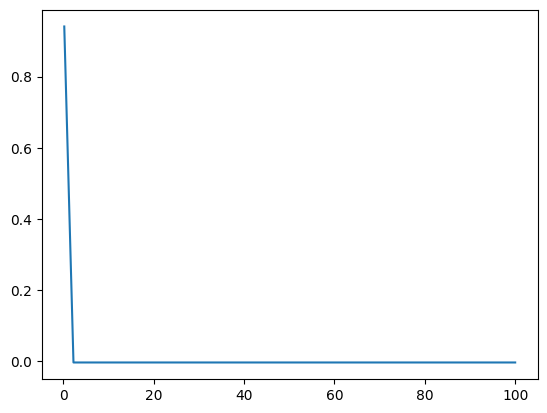

In [46]:
R2 = []
for a in alphas:
    model = Lasso(alpha=a, max_iter=1000000)
    model.fit(x_train_esc, y_train)
    y_pred = model.predict(x_test_esc)
    R2.append(r2_score(y_test, y_pred))
plt.plot(alphas, R2)
plt.show()